# Trabalho 01

In [169]:
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np

## AP00 ~ Interface Gráfica

1. Implementar uma interface gráfica que servirá como "casca" para receber as implementações das diversas funções de processamento de imagens que serão solicitadas futuramente.

Requisitos:

* Linguagem de Programação: Python;
* Implementar uma função para carregar e exibir uma imagem;
* Implementar uma função para salvar uma imagem;

In [202]:
def load_img(filename, gray=True):
    img = ski.io.imread(filename)
    if len(img.shape) > 2:
        return img[:,:,0] if gray else img
    return img

def show_img(img):
    ski.io.imshow(img, cmap='gray')

def save_img(img, filename):
    ski.io.imsave(filename, img)

## AP01 ~ Transformação de Intensidade

Na casca de programa solicitada anteriormente, implemente as seguintes funções:

1. Transformação de Potência: possibilitando ao usuário definir o valor de gama e utilizar o valor de c = 1;

2. Alargamento de contraste: possibilitanto ao usuário definir os valores de (r1, s1) e (r2, s2);

3. Fatiamento por Planos de Bits: possibilitando ao usuário selecionar o plano de bits desejado para a visualização.

*Obs.: Algumas imagens originais para teste estão disponíveis no arquivo para download.*

In [322]:
def adjust_scale(img, k=1):
    fm = img - img.min()
    return k*(fm/fm.max())

# s = cr^y
def transf_potencia(img, c=1, y=1):
    scaled_k1 = adjust_scale(img, k=1)
    return adjust_scale(c*scaled_k1**y, k=1)

def transf_alarga(img, axis1, axis2):    
    shape = img.shape
    t_img = np.zeros(shape)
    for i in range(0, shape[0]):
      for j in range(0, shape[1]):
        pos = (i,j)
        if img[pos] <= axis1[0]:
            t_img[pos] = axis1[1]
        elif img[pos] >= axis2[0]:
            t_img[pos] = axis2[1]
        else:
            t_img[pos] = img[pos]
    return t_img

def transf_plano(img, plan=1):
    shape = img.shape
    p_img = np.zeros(shape)

    max_len = len(bin(img.max()))
    for i in range(0, shape[0]):
      for j in range(0, shape[1]):
        b_str = bin(img[i,j])
        b_str = b_str[0:2] + b_str[2:].rjust(max_len-2, '0')
        b_str = b_str[0:2] + b_str[-plan:].rjust(len(b_str[2:]),'0') 
        p_img[i,j] = int(b_str, base=2)
    return p_img

## Testing

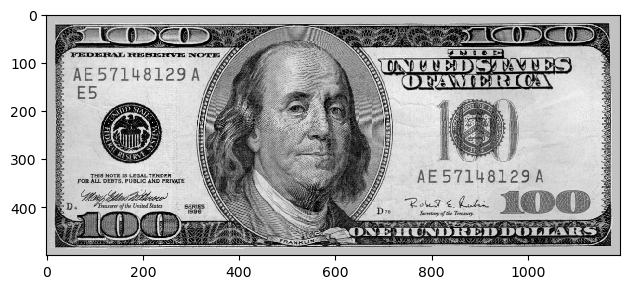

In [314]:
img = load_img("images/dolar.tif")
show_img(img)

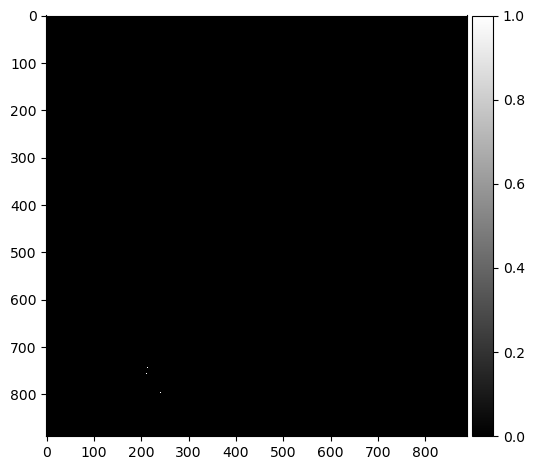

In [205]:
show_img(ski.exposure.adjust_gamma(img, gamma=10))

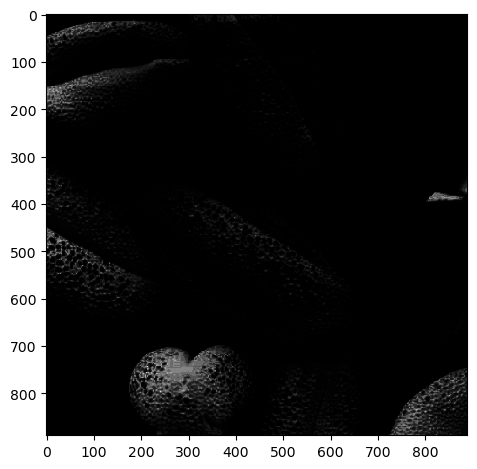

In [206]:
img_t = trans_potencia(img, y=10)
show_img(img_t)

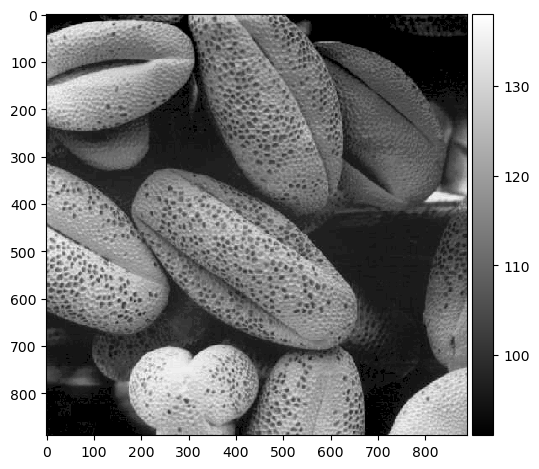

In [208]:
img_t = trans_alarga(img, axis1=(80, 0), axis2=(150,255))
show_img(img_t)

In [336]:
p_img = transf_plano(img, plan=8)
p_img

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 194., 194., ..., 194., 194.,   0.],
       [  0., 194., 194., ..., 194., 194.,   0.],
       ...,
       [  0., 194., 194., ..., 194., 194.,   0.],
       [  0., 194., 194., ..., 194., 194.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

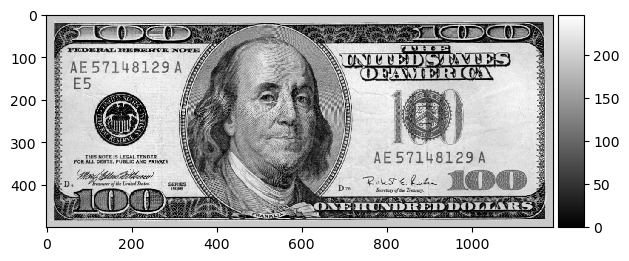

In [334]:
show_img(p_img)

In [260]:
bin(255)

'0b11111111'